In [3]:
# Подключаем библиотеки
import pandas as pd # Работа с набором данных
import numpy as np # Линейная алгебра
# Визуализация данных
import seaborn as sns
import matplotlib.pyplot as plt

# отключение информационных сообщений
from warnings import filterwarnings
filterwarnings(action='ignore')

In [4]:
url = 'https://raw.githubusercontent.com/ViolettaKalennikova/mo2025/refs/heads/main/data/UserModeling.csv'
data = pd.read_csv(url)
data.head(5)

#я знаю, что у меня ошибка в датасете. надо было VeryLow и very_low объединить
#это можно сделать через поиск элемента и замену, я умею, просто уже не стала переделывать, чтобы просто отработать тему на уже готовом.

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low


In [5]:
data.dtypes

,0
STG,float64
SCG,float64
STR,float64
LPR,float64
PEG,float64
UNS,object


In [13]:
# Описательная статистика, применяется для числовых полей
data.describe()

,STG,SCG,STR,LPR,PEG
count,403.000000,403.000000,403.000000,403.000000,403.000000
mean,0.353141,0.355940,0.457655,0.431342,0.456360
std,0.212018,0.215531,0.246684,0.257545,0.266775
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.200000,0.265000,0.250000,0.250000
50%,0.300000,0.300000,0.440000,0.330000,0.400000
75%,0.480000,0.510000,0.680000,0.650000,0.660000
max,0.990000,0.900000,0.950000,0.990000,0.990000


In [14]:
# Найдите описательную статистику по каждоу классу отдельно (нужно использовать фильт данных в pandas)
data.groupby('UNS').describe()

STG                                                            \
          count      mean       std   min      25%     50%      75%   max   
UNS                                                                         
High      102.0  0.406902  0.246484  0.00  0.21250  0.3200  0.49375  0.99   
Low       129.0  0.326783  0.180934  0.02  0.18000  0.2900  0.42000  0.73   
Middle    122.0  0.374574  0.210005  0.06  0.19250  0.3125  0.49375  0.80   
VeryLow    26.0  0.216154  0.157304  0.00  0.10000  0.1900  0.27500  0.54   
very_low   24.0  0.305792  0.187292  0.00  0.22125  0.2775  0.38250  0.68   

            SCG            ...     LPR          PEG                            \
          count      mean  ...     75%   max  count      mean       std   min   
UNS                        ...                                                  
High      102.0  0.430500  ...  0.8075  0.99  102.0  0.799804  0.109734  0.47   
Low       129.0  0.322798  ...  0.6400  0.98  129.0  0.253589  0.071131  0.01   
Middle    122.0  0.367189  ...  0.5675  0.99  122.0  0.531393  0.130924  0.24   
VeryLow    26.0  0.320769  ...  0.2600  0.45   26.0  0.100385  0.055026  0.01   
very_low   24.0  0.198125  ...  0.5050  0.66   24.0  0.090833  0.056331  0.00   

                                     
            25%   50%     75%   max  
UNS                                  
High      0.770  0.81  0.8800  0.99  
Low       0.210  0.27  0.3100  0.40  
Middle    0.500  0.57  0.6200  0.83  
VeryLow   0.070  0.10  0.1175  0.25  
very_low  0.065  0.10  0.1025  0.24  

[5 rows x 40 columns]

In [15]:
# количество объектов каждого класса
data.groupby('UNS').size()

,0
UNS,
High,102
Low,129
Middle,122
VeryLow,26
very_low,24


<Axes: xlabel='STG', ylabel='SCG'>

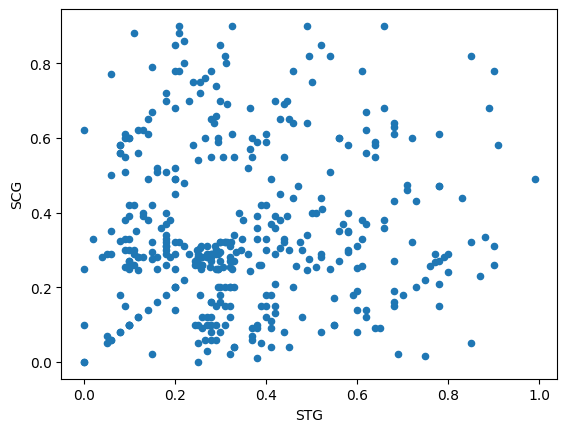

In [16]:
data.plot(kind='scatter',x='STG', y='SCG') # создадим точечную диаграмму

<Axes: xlabel='STR', ylabel='LPR'>

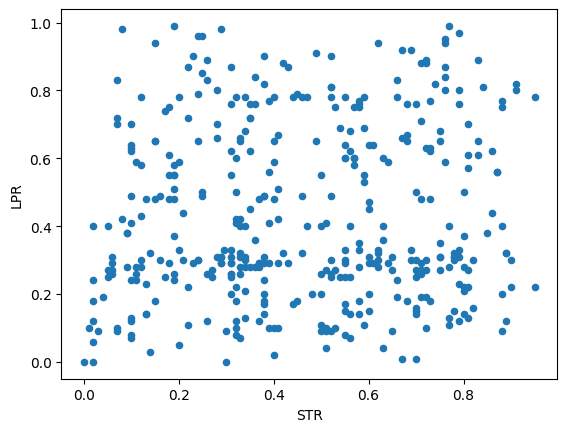

In [17]:
data.plot(kind='scatter',x='STR', y='LPR') # создадим точечную диаграмму

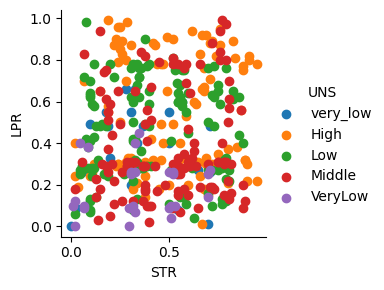

In [19]:
# используем seaborn FacetGrid чтобы отобразить элементы каждого класса
sns.FacetGrid(data, hue = 'UNS') \
    .map(plt.scatter,'STR', 'LPR') \
    .add_legend()

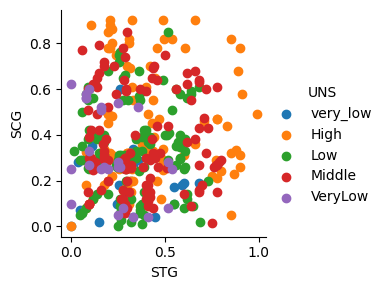

In [20]:
# используем seaborn FacetGrid чтобы отобразить элементы каждого класса
sns.FacetGrid(data, hue = 'UNS') \
    .map(plt.scatter, 'STG','SCG') \
    .add_legend()

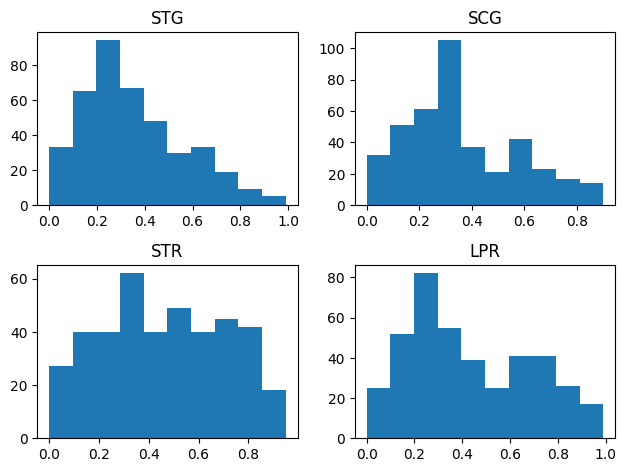

In [21]:
# Гистограммы по каждому параметру
n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(data['STG'], bins = n_bins);
axs[0,0].set_title('STG');
axs[0,1].hist(data['SCG'], bins = n_bins);
axs[0,1].set_title('SCG');
axs[1,0].hist(data['STR'], bins = n_bins);
axs[1,0].set_title('STR');
axs[1,1].hist(data['LPR'], bins = n_bins);
axs[1,1].set_title('LPR');

# добавим отступы между диаграммами
fig.tight_layout(pad=1.0);

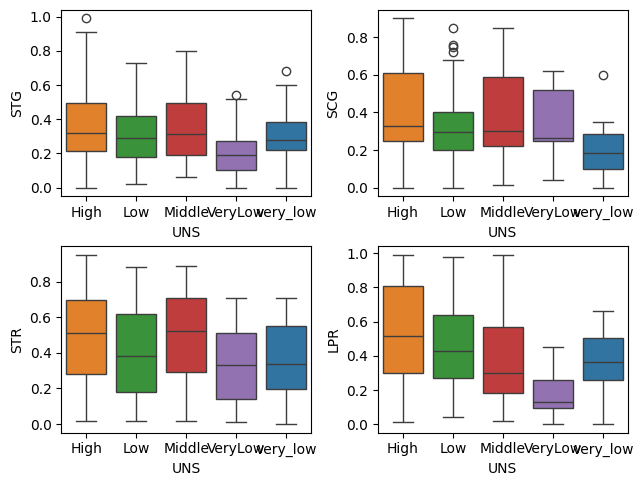

In [28]:
# диаграмма ящик с усами seaborn
fig, axs = plt.subplots(2, 2)
fn = ['STG','SCG','STR', 'LPR' ]
cn = ["High", "Low", "Middle", "VeryLow", "very_low"]
sns.boxplot(x = 'UNS', y = 'STG', data = data, order = cn, ax = axs[0,0], hue = 'UNS');
sns.boxplot(x = 'UNS', y = 'SCG', data = data, order = cn, ax = axs[0,1], hue = 'UNS');
sns.boxplot(x = 'UNS', y = 'STR', data = data, order = cn, ax = axs[1,0], hue = 'UNS');
sns.boxplot(x = 'UNS', y = 'LPR', data = data,  order = cn, ax = axs[1,1], hue = 'UNS');

fig.tight_layout(pad=0.5);

<Axes: xlabel='UNS', ylabel='STG'>

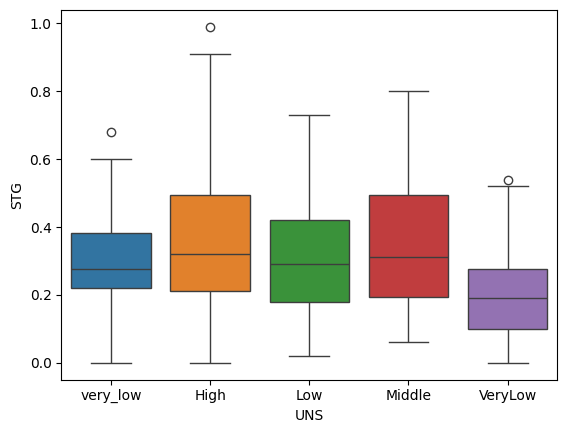

In [30]:
# Мы можем посмотреть на индивидуальный параметр в Seaborn через коробочную диаграмму.
sns.boxplot(x='UNS', y='STG', data=data, hue = 'UNS')

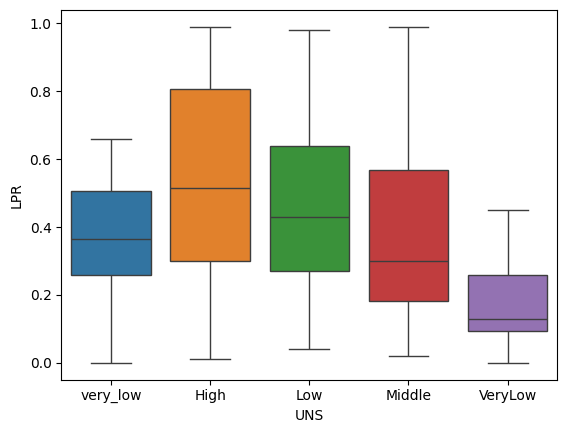

In [32]:
sns.boxplot(x = 'UNS', y = 'LPR', data = data, hue = 'UNS');

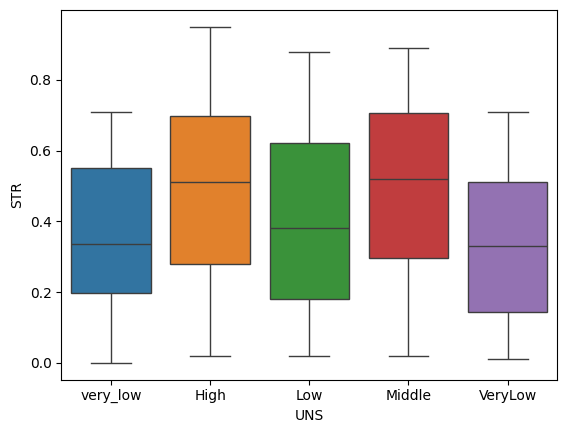

In [33]:
sns.boxplot(x = 'UNS', y = 'STR', data = data, hue = 'UNS');

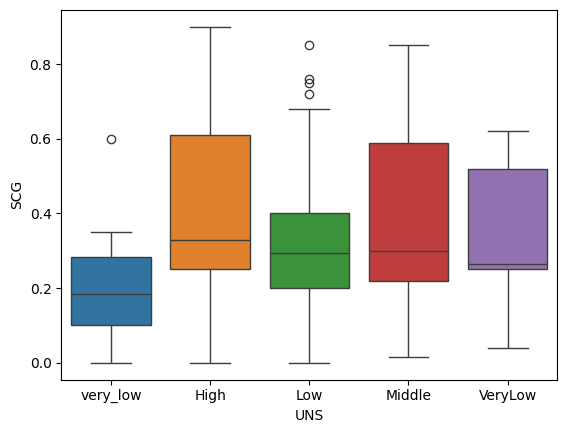

In [34]:
sns.boxplot(x = 'UNS', y = 'SCG', data = data, hue = 'UNS');

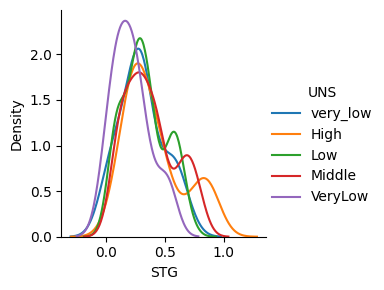

In [35]:
# Полезным  графиком для изучения одномерных отношений является kdeplot,
# который создает и визуализирует оценку плотности распределения

sns.FacetGrid(data, hue='UNS') \
   .map(sns.kdeplot, "STG") \
   .add_legend()

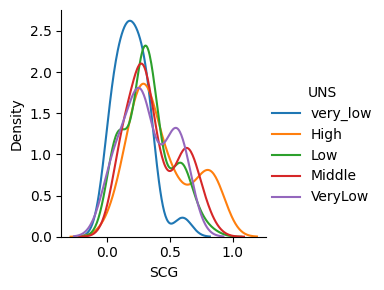

In [36]:
sns.FacetGrid(data, hue='UNS') \
   .map(sns.kdeplot, "SCG") \
   .add_legend()

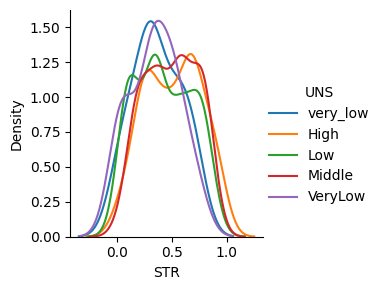

In [37]:
sns.FacetGrid(data, hue='UNS') \
   .map(sns.kdeplot, "STR") \
   .add_legend()

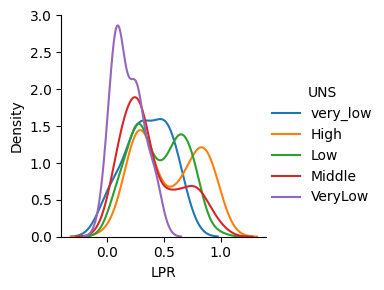

In [38]:
sns.FacetGrid(data, hue='UNS') \
   .map(sns.kdeplot, "LPR") \
   .add_legend()

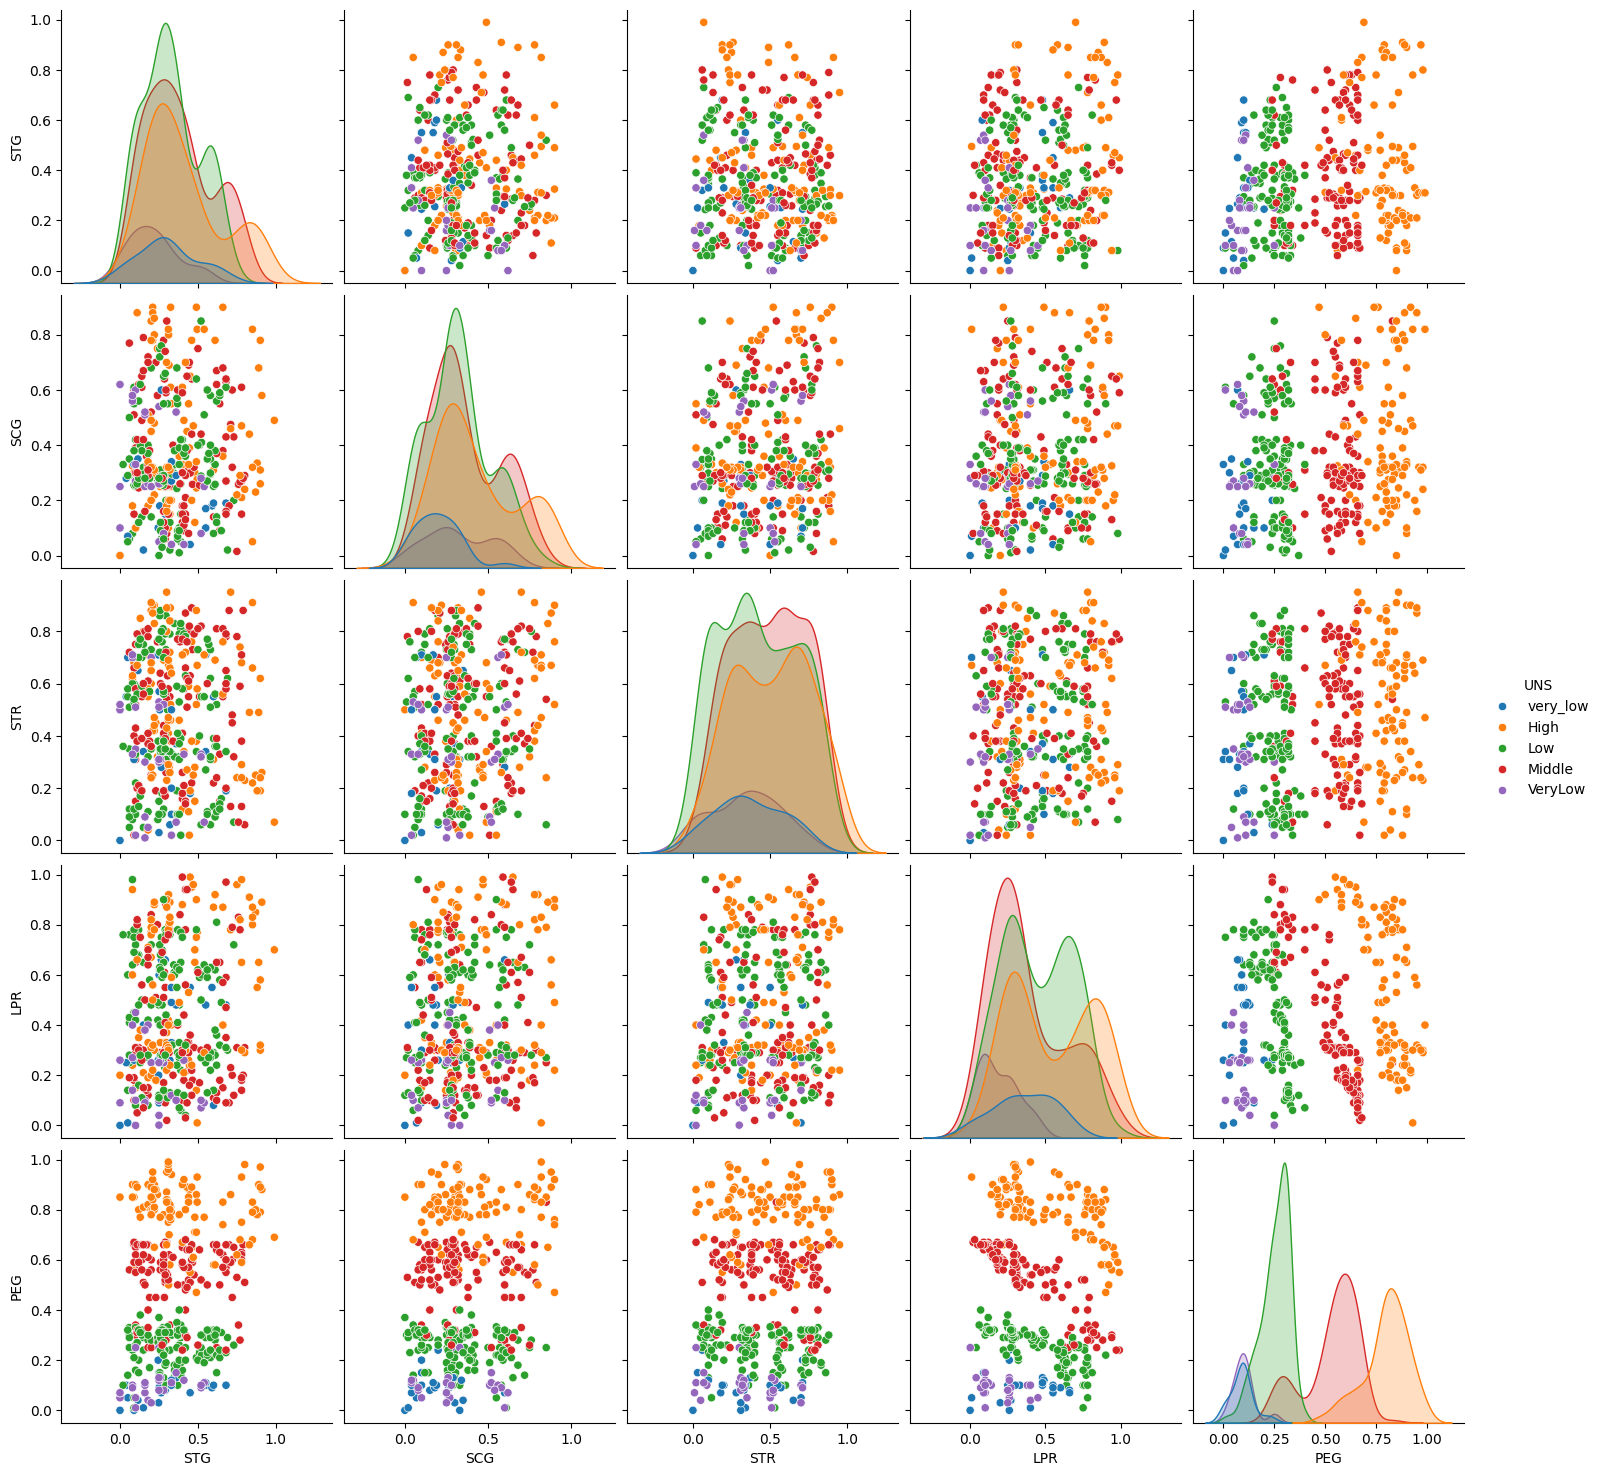

In [39]:
# двумерная связь
# матрица диаграммы рассеяния
sns.pairplot(data, hue='UNS', size=3)

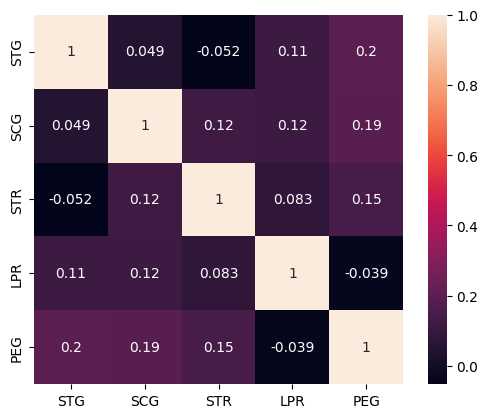

In [41]:
# Корреляционная матрица
# Корреляционная матрица
corrmat = data.drop(columns=['UNS']).corr()
sns.heatmap(corrmat, annot=True, square=True);

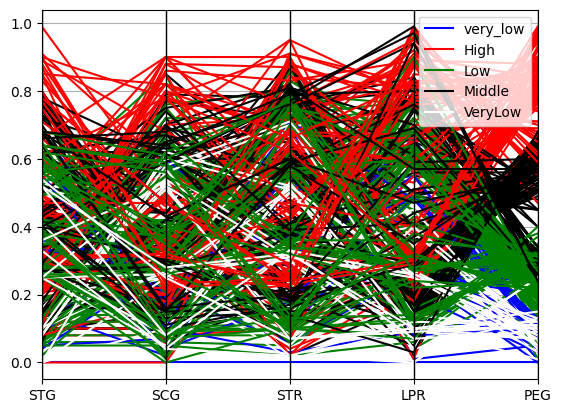

In [47]:
# parallel coordinates
pd.plotting.parallel_coordinates(data, 'UNS', color = ['blue', 'red', 'green', "black","white" ]);

#знаю, выглядит стращно, но это все из-за verylow